In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.display import Image 

# dataset yang dipakai adalah WHO.csv, berisi kualitas hidup/harapan hidup pada negara-dengan dalam rentang waktu 2000 - 2015

## Data yang dpakai adalah data dari Indonesia

#### Problem :
`Berdasarkan metrokota (https://data.metrokota.go.id/2017/05/04/angka-harapan-hidup/), Angka Harapan Hidup merupakan alat untuk mengevaluasi kinerja pemerintah dalam meningkatkan kesejahteraan penduduk pada umumnya, dan meningkatkan derajat kesehatan pada khususnya. Sebagai negara berkembang, tentu menjadi hal baik bagi Indonesia untuk terus meningkatkan angka harapan hidup masyarakatnya terutama dalam proses mengembangkan negara lebih baik. `


#### Goal:
`mendapat insight aspek (kecil maupun besar) yang mempengaruhi tingkat harapan hidup berdasarkan data dari Indonesia, guna meningkatkan harapan hidup di Indonesia pada tahun - tahun berikutnya`

In [192]:
df = pd.read_csv('./data/WHO.csv', index_col=None)
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


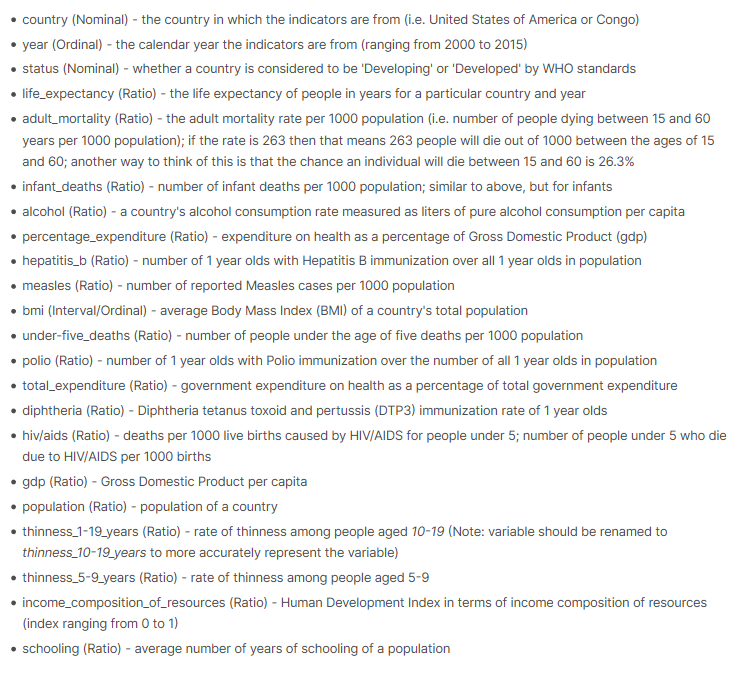

In [101]:
Image("./life.PNG")

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [102]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [103]:
pd.DataFrame(dataDesc, columns=[
    "Nama Kolom",
    "Tipe Kolom",
    "Jumlah Null",
    "Presentase Null",
    "Jumlah Data Unik",
    "Contoh Data Unik"
])

,Nama Kolom,Tipe Kolom,Jumlah Null,Presentase Null,Jumlah Data Unik,Contoh Data Unik
0,Country,object,0,0.00,193,"[Cuba, Saint Lucia]"
1,Year,int64,0,0.00,16,"[2013, 2011]"
2,Status,object,0,0.00,2,"[Developed, Developing]"
3,Life expectancy,float64,10,0.34,362,"[48.0, 83.4]"
4,Adult Mortality,float64,10,0.34,425,"[648.0, 274.0]"
5,infant deaths,int64,0,0.00,209,"[112, 60]"
6,Alcohol,float64,194,6.60,1076,"[7.22, 5.27]"
7,percentage expenditure,float64,0,0.00,2328,"[1435.487755, 42.3304549]"
8,Hepatitis B,float64,553,18.82,87,"[38.0, 83.0]"
9,Measles,int64,0,0.00,958,"[928, 701]"


## membangun Variabel yang menampung hanya data Indonesia

In [193]:
df_indo = df[df['Country']=='Indonesia']
df_indo

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1202,Indonesia,2015,Developing,69.1,176.0,114,NaN,0.000000,78.0,15099,...,8.0,NaN,78.0,0.3,3336.166860,258162113.0,1.4,1.2,0.686,12.9
1203,Indonesia,2014,Developing,68.9,179.0,119,0.09,200.068444,78.0,12943,...,8.0,2.85,78.0,0.3,3491.595887,255131116.0,1.4,1.2,0.682,12.9
1204,Indonesia,2013,Developing,68.7,181.0,124,0.09,22.847831,85.0,8419,...,86.0,2.93,85.0,0.3,362.663981,25232263.0,1.5,1.3,0.677,12.9
1205,Indonesia,2012,Developing,68.5,183.0,129,0.08,254.468826,83.0,15489,...,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
1206,Indonesia,2011,Developing,68.3,185.0,134,0.08,211.878340,81.0,21893,...,81.0,2.71,81.0,0.3,3634.276850,24577511.0,1.6,1.5,0.662,12.3
1207,Indonesia,2010,Developing,68.1,187.0,138,0.08,190.545365,83.0,18869,...,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
1208,Indonesia,2009,Developing,67.9,189.0,143,0.08,125.798068,82.0,20818,...,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7
1209,Indonesia,2008,Developing,67.7,189.0,149,0.07,10.263411,82.0,15369,...,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
1210,Indonesia,2007,Developing,67.5,19.0,154,0.06,102.633435,76.0,19456,...,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
1211,Indonesia,2006,Developing,67.3,191.0,159,0.06,72.015932,66.0,20422,...,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9


In [194]:
df_indo.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Handling Missing Value pada Alcohol Column menggunakan Median

In [195]:
df_indo['Alcohol']

1202     NaN
1203    0.09
1204    0.09
1205    0.08
1206    0.08
1207    0.08
1208    0.08
1209    0.07
1210    0.06
1211    0.06
1212    0.06
1213    0.06
1214    0.05
1215    0.05
1216    0.06
1217    0.06
Name: Alcohol, dtype: float64

In [196]:
df_alkohol = df_indo
rata_alkohol = df_alkohol['Alcohol'].median()
df_alkohol['Alcohol'] = df_alkohol['Alcohol'].fillna(rata_alkohol)
df_alkohol['Alcohol'].isna().sum()

/home/st-pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [197]:
df_indo['Alcohol']

1202    0.06
1203    0.09
1204    0.09
1205    0.08
1206    0.08
1207    0.08
1208    0.08
1209    0.07
1210    0.06
1211    0.06
1212    0.06
1213    0.06
1214    0.05
1215    0.05
1216    0.06
1217    0.06
Name: Alcohol, dtype: float64

## Handling Missing Value pada Total Expenditure Column menggunakan Median

In [198]:
df_indo['Total expenditure']

1202     NaN
1203    2.85
1204    2.93
1205    2.90
1206    2.71
1207    2.74
1208    2.83
1209    2.81
1210    3.10
1211    2.91
1212    2.79
1213    2.37
1214    2.53
1215    2.27
1216    2.23
1217    1.98
Name: Total expenditure, dtype: float64

In [199]:
df_expend = df_indo
rata_expend = df_expend['Total expenditure'].median()
df_expend['Total expenditure'] = df_expend['Total expenditure'].fillna(rata_expend)
df_expend['Total expenditure'].isna().sum()

/home/st-pierre/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0

In [200]:
df_indo['Total expenditure']

1202    2.79
1203    2.85
1204    2.93
1205    2.90
1206    2.71
1207    2.74
1208    2.83
1209    2.81
1210    3.10
1211    2.91
1212    2.79
1213    2.37
1214    2.53
1215    2.27
1216    2.23
1217    1.98
Name: Total expenditure, dtype: float64

In [201]:
df_indo.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [162]:
data_numerik = df_indo.drop(df.columns[[0, 1, 2]], axis=1) 
data_numerik.describe().T

,count,mean,std,min,25%,50%,75%,max
Life expectancy,16.0,6.755625e+01,1.049424e+00,6.530000e+01,6.685000e+01,6.760000e+01,6.835000e+01,6.910000e+01
Adult Mortality,16.0,1.665625e+02,5.814690e+01,1.900000e+01,1.805000e+02,1.875000e+02,1.890000e+02,2.130000e+02
infant deaths,16.0,1.511875e+02,2.351515e+01,1.140000e+02,1.327500e+02,1.515000e+02,1.732500e+02,1.870000e+02
Alcohol,16.0,6.812500e-02,1.327592e-02,5.000000e-02,6.000000e-02,6.000000e-02,8.000000e-02,9.000000e-02
percentage expenditure,16.0,8.376832e+01,8.643873e+01,0.000000e+00,9.812597e+00,4.926987e+01,1.419849e+02,2.544688e+02
Hepatitis B,16.0,7.356250e+01,8.884209e+00,6.200000e+01,6.475000e+01,7.700000e+01,8.200000e+01,8.500000e+01
Measles,16.0,1.624494e+04,6.931544e+03,3.344000e+03,1.410475e+04,1.567100e+04,2.052100e+04,2.917100e+04
BMI,16.0,1.995625e+01,6.023617e+00,2.500000e+00,1.730000e+01,2.050000e+01,2.402500e+01,2.740000e+01
under-five deaths,16.0,1.866250e+02,3.418942e+01,1.360000e+02,1.592500e+02,1.845000e+02,2.167500e+02,2.370000e+02
Polio,16.0,6.218750e+01,3.249455e+01,8.000000e+00,5.600000e+01,7.850000e+01,8.225000e+01,8.600000e+01


In [95]:
data_numerik

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1202,69.1,176.0,114,0.06,0.000000,78.0,15099,27.4,136,8.0,2.79,78.0,0.3,3336.166860,258162113.0,1.4,1.2,0.686,12.9
1203,68.9,179.0,119,0.09,200.068444,78.0,12943,26.5,142,8.0,2.85,78.0,0.3,3491.595887,255131116.0,1.4,1.2,0.682,12.9
1204,68.7,181.0,124,0.09,22.847831,85.0,8419,25.6,148,86.0,2.93,85.0,0.3,362.663981,25232263.0,1.5,1.3,0.677,12.9
1205,68.5,183.0,129,0.08,254.468826,83.0,15489,24.7,154,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
1206,68.3,185.0,134,0.08,211.878340,81.0,21893,23.8,161,81.0,2.71,81.0,0.3,3634.276850,24577511.0,1.6,1.5,0.662,12.3
1207,68.1,187.0,138,0.08,190.545365,83.0,18869,22.9,167,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
1208,67.9,189.0,143,0.08,125.798068,82.0,20818,22.1,174,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7
1209,67.7,189.0,149,0.07,10.263411,82.0,15369,21.3,181,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
1210,67.5,19.0,154,0.06,102.633435,76.0,19456,2.5,188,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
1211,67.3,191.0,159,0.06,72.015932,66.0,20422,19.7,194,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9


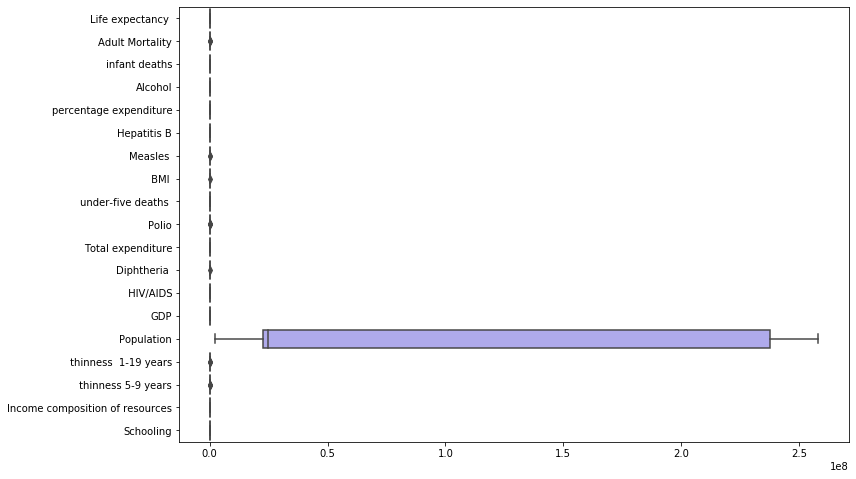

In [107]:
sns.boxplot(data=data_numerik, orient='h')

## Korelasi antar Kolom/Variabel

Correlation matrix-


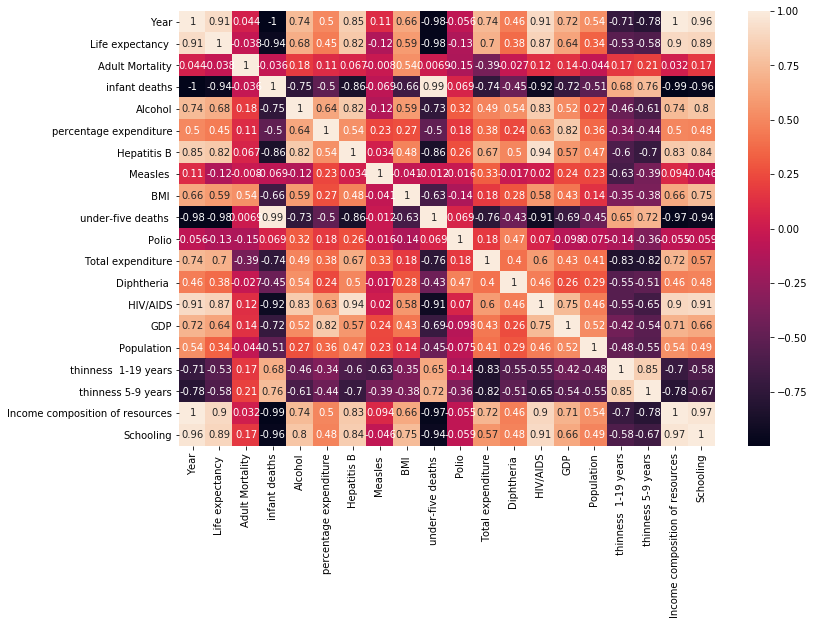

In [110]:
print("Correlation matrix-")
plt.rcParams['figure.figsize']=(12,8)
corrMatrix = df_indo.corr()
sns.heatmap(corrMatrix,cmap='rocket', annot=True);

## Melihat trend beberapa variabel - variabel dari data Indonesia

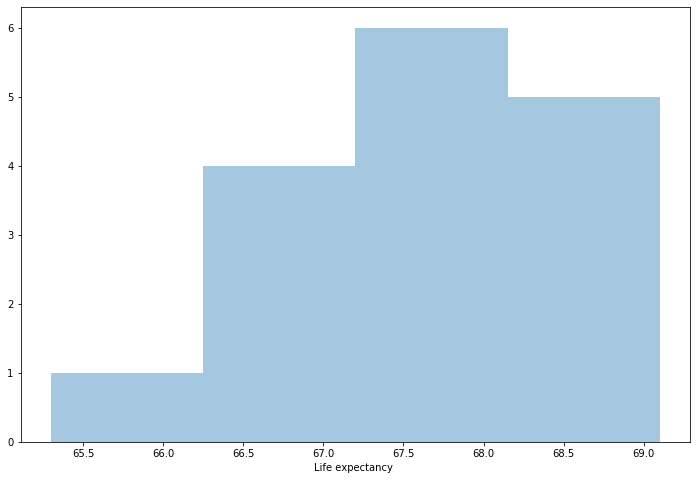

In [244]:
sns.distplot(df_indo['Life expectancy '], kde=False)

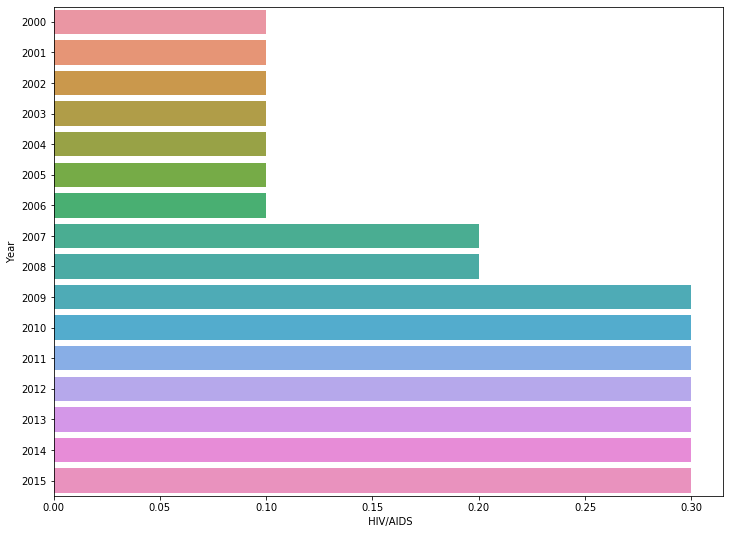

In [123]:
plt.figure(figsize=(12,9))
sns.barplot(x=' HIV/AIDS', y='Year', data=df_indo, orient='h')
plt.show()

In [129]:
df_indo['Income composition of resources']

1202    0.686
1203    0.682
1204    0.677
1205    0.669
1206    0.662
1207    0.656
1208    0.645
1209    0.641
1210    0.638
1211    0.632
1212    0.629
1213    0.624
1214    0.613
1215    0.608
1216    0.604
1217    0.597
Name: Income composition of resources, dtype: float64

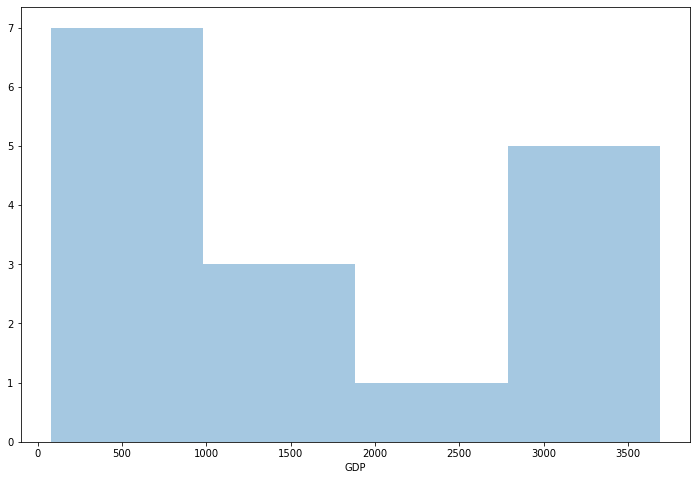

In [236]:
sns.distplot(df_indo['GDP'], kde=False, bins=4)

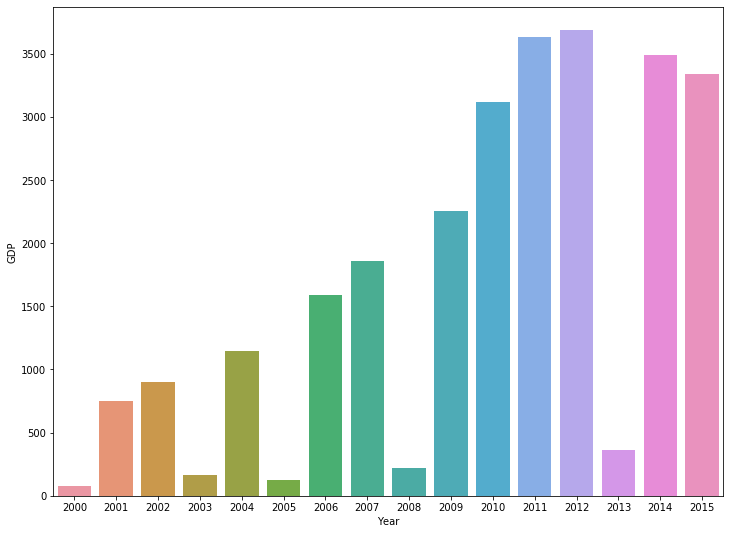

In [131]:
plt.figure(figsize=(12,9))
sns.barplot(x='Year', y='GDP', data=df_indo)
plt.show()

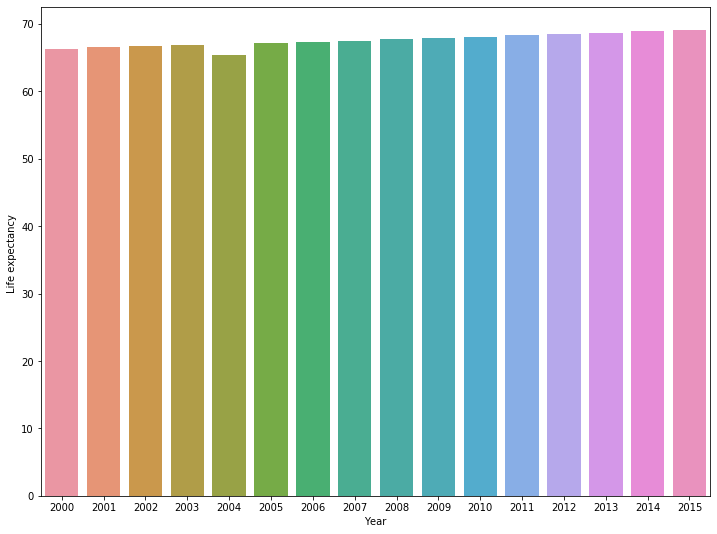

In [265]:
plt.figure(figsize=(12,9))
sns.barplot(x='Year', y='Life expectancy ', data=df_indo)
plt.show()

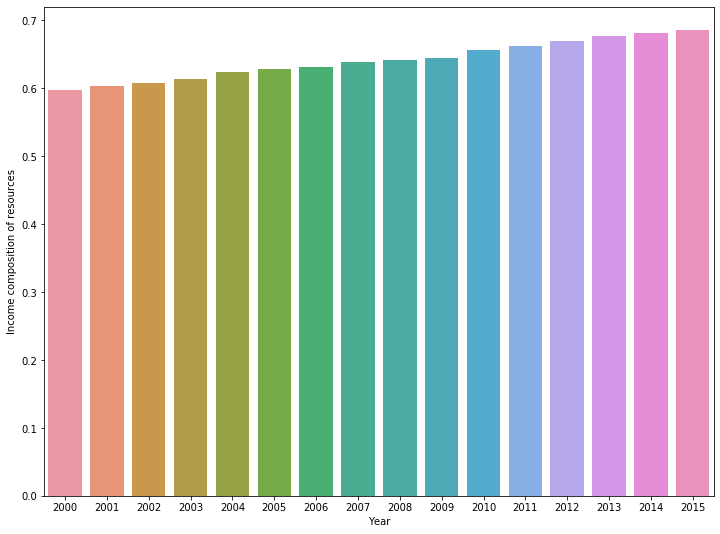

In [126]:
plt.figure(figsize=(12,9))
sns.barplot(x='Year', y='Income composition of resources', data=df_indo)
plt.show()

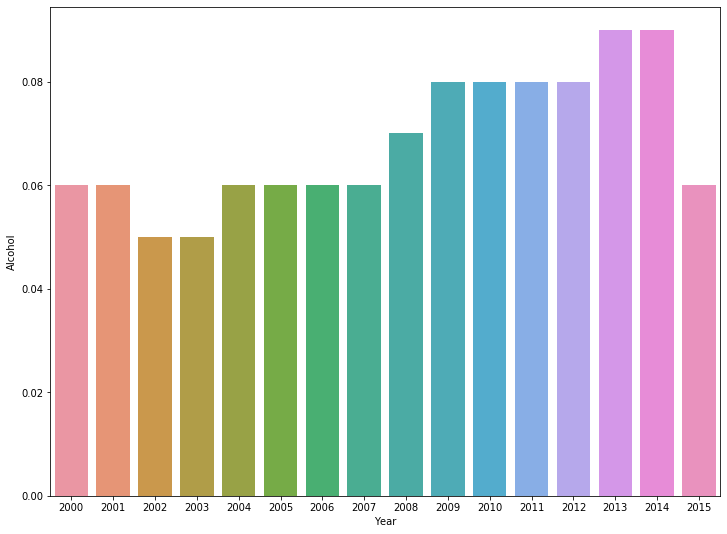

In [136]:
plt.figure(figsize=(12,9))
sns.barplot(x='Year', y='Alcohol', data=df_indo)
plt.show()

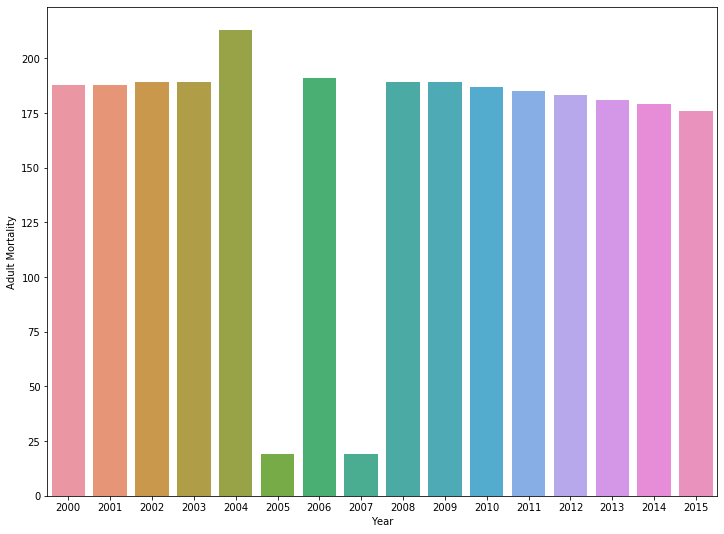

In [149]:
plt.figure(figsize=(12,9))
sns.barplot(x='Year', y='Adult Mortality', data=df_indo)
plt.show()

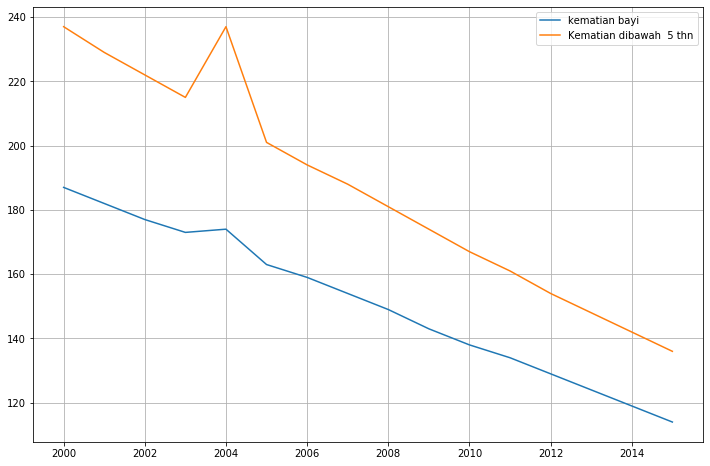

In [202]:
plt.plot(df_indo['Year'], df_indo['infant deaths'],df_indo['Year'], df_indo['under-five deaths '])
plt.grid(True)
plt.legend(['kematian bayi', 'Kematian dibawah  5 thn'], loc=0)

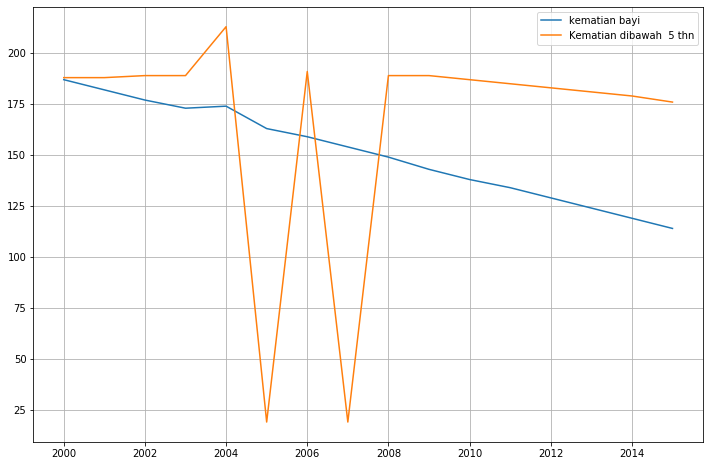

In [203]:
plt.plot(df_indo['Year'], df_indo['infant deaths'],df_indo['Year'], df_indo['Adult Mortality'])
plt.grid(True)
plt.legend(['kematian bayi', 'Kematian dibawah  5 thn'], loc=0)

`Pada kolom 'Adult Mortality', terdapat 2 nilai yang kemungkinan adalah kesalahan input, untuk itu diasumsikan sesuai nilai jumlah digit nilai yang lain, maka 19.0 dibuat menjadi 190.0`

In [204]:
df_indo['Adult Mortality']

1202    176.0
1203    179.0
1204    181.0
1205    183.0
1206    185.0
1207    187.0
1208    189.0
1209    189.0
1210     19.0
1211    191.0
1212     19.0
1213    213.0
1214    189.0
1215    189.0
1216    188.0
1217    188.0
Name: Adult Mortality, dtype: float64

In [205]:
df_indo.loc[df_indo['Adult Mortality']==19.0, 'Adult Mortality'] = 190.0

/home/st-pierre/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [206]:
df_indo

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1202,Indonesia,2015,Developing,69.1,176.0,114,0.06,0.000000,78.0,15099,...,8.0,2.79,78.0,0.3,3336.166860,258162113.0,1.4,1.2,0.686,12.9
1203,Indonesia,2014,Developing,68.9,179.0,119,0.09,200.068444,78.0,12943,...,8.0,2.85,78.0,0.3,3491.595887,255131116.0,1.4,1.2,0.682,12.9
1204,Indonesia,2013,Developing,68.7,181.0,124,0.09,22.847831,85.0,8419,...,86.0,2.93,85.0,0.3,362.663981,25232263.0,1.5,1.3,0.677,12.9
1205,Indonesia,2012,Developing,68.5,183.0,129,0.08,254.468826,83.0,15489,...,84.0,2.90,83.0,0.3,3687.953996,248883232.0,1.5,1.4,0.669,12.6
1206,Indonesia,2011,Developing,68.3,185.0,134,0.08,211.878340,81.0,21893,...,81.0,2.71,81.0,0.3,3634.276850,24577511.0,1.6,1.5,0.662,12.3
1207,Indonesia,2010,Developing,68.1,187.0,138,0.08,190.545365,83.0,18869,...,82.0,2.74,81.0,0.3,3113.486350,242524123.0,1.6,1.5,0.656,12.1
1208,Indonesia,2009,Developing,67.9,189.0,143,0.08,125.798068,82.0,20818,...,85.0,2.83,78.0,0.3,2254.445660,23934478.0,1.7,1.6,0.645,11.7
1209,Indonesia,2008,Developing,67.7,189.0,149,0.07,10.263411,82.0,15369,...,83.0,2.81,77.0,0.2,216.527660,236159276.0,1.7,1.7,0.641,11.7
1210,Indonesia,2007,Developing,67.5,190.0,154,0.06,102.633435,76.0,19456,...,77.0,3.10,73.0,0.2,1855.939150,232989141.0,1.8,1.7,0.638,11.0
1211,Indonesia,2006,Developing,67.3,191.0,159,0.06,72.015932,66.0,20422,...,78.0,2.91,72.0,0.1,1586.254000,22983822.0,1.8,1.8,0.632,10.9


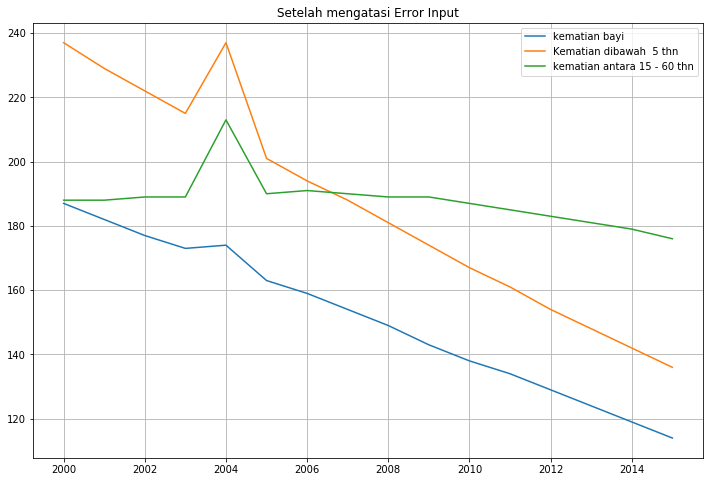

In [224]:
plt.plot(df_indo['Year'], df_indo['infant deaths'], df_indo['Year'], df_indo['under-five deaths ']
         , df_indo['Year'], df_indo['Adult Mortality'])
plt.grid(True)
plt.title('Setelah mengatasi Error Input')
plt.legend(['kematian bayi', 'Kematian dibawah  5 thn', 'kematian antara 15 - 60 thn'], loc=0)

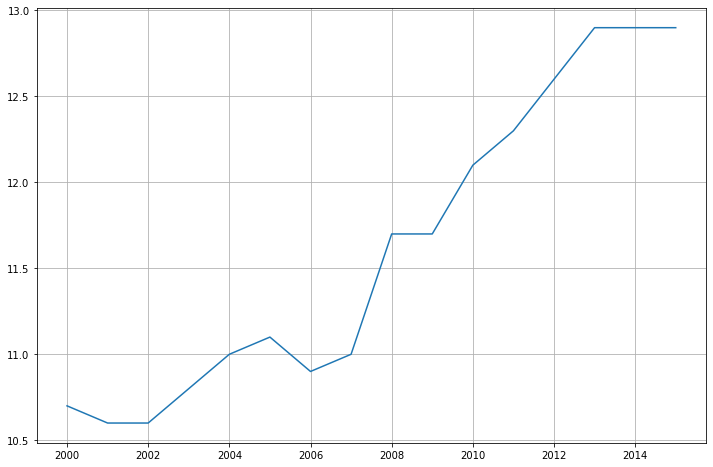

In [246]:
plt.plot(df_indo['Year'], df_indo['Schooling'])
plt.grid(True)

## Perbandingan Beberapa Value antara Indonesia dengan 2-3 Negara tetangga

##### Singapura

In [211]:
df_sing = df[df['Country']=='Singapore']
df_sing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2313,Singapore,2015,Developed,83.1,55.0,0,1.79,0.000000,96.0,0,...,96.0,NaN,96.0,0.1,53629.73746,NaN,2.2,2.2,0.924,15.4
2314,Singapore,2014,Developed,82.9,56.0,0,1.83,7971.646361,96.0,0,...,96.0,4.92,96.0,0.1,56336.72340,NaN,2.2,2.2,0.922,15.4
2315,Singapore,2013,Developed,82.7,57.0,0,1.83,714.344102,97.0,138,...,97.0,4.53,97.0,0.1,5629.18914,NaN,2.2,2.2,0.920,15.4
2316,Singapore,2012,Developed,82.5,59.0,0,1.89,6041.858981,97.0,42,...,97.0,4.22,97.0,0.1,54431.16199,NaN,2.2,2.1,0.917,15.4
2317,Singapore,2011,Developed,82.2,6.0,0,1.80,638.000110,96.0,148,...,96.0,3.93,96.0,0.1,53166.67581,NaN,2.1,2.1,0.911,15.2
2318,Singapore,2010,Developed,82.0,61.0,0,1.84,4540.543752,96.0,50,...,96.0,3.96,96.0,0.1,46569.67951,NaN,2.1,2.1,0.889,14.5
2319,Singapore,2009,Developed,81.7,62.0,0,1.73,462.930699,96.0,16,...,97.0,4.27,97.0,0.1,38577.55822,NaN,2.1,2.1,0.887,14.4
2320,Singapore,2008,Developed,81.4,64.0,0,1.70,3404.130990,97.0,18,...,97.0,3.91,97.0,0.1,39721.48180,NaN,2.1,2.1,0.880,14.2
2321,Singapore,2007,Developed,81.1,65.0,0,1.60,3082.973535,96.0,15,...,97.0,3.46,97.0,0.1,39223.58187,NaN,2.1,2.0,0.873,14.1
2322,Singapore,2006,Developed,87.0,66.0,0,1.55,2639.376955,95.0,23,...,95.0,3.66,95.0,0.1,33579.85948,NaN,2.1,2.0,0.839,13.9


In [249]:
df_sing.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   1
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                         16
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64

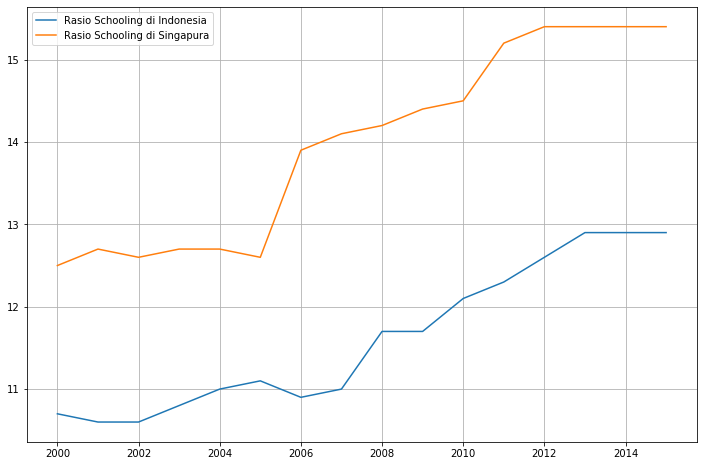

In [261]:
plt.plot(df_indo['Year'], df_indo['Schooling'],df_sing['Year'], df_sing['Schooling'])
plt.grid(True)
plt.legend(['Rasio Schooling di Indonesia', 'Rasio Schooling di Singapura'], loc=0)

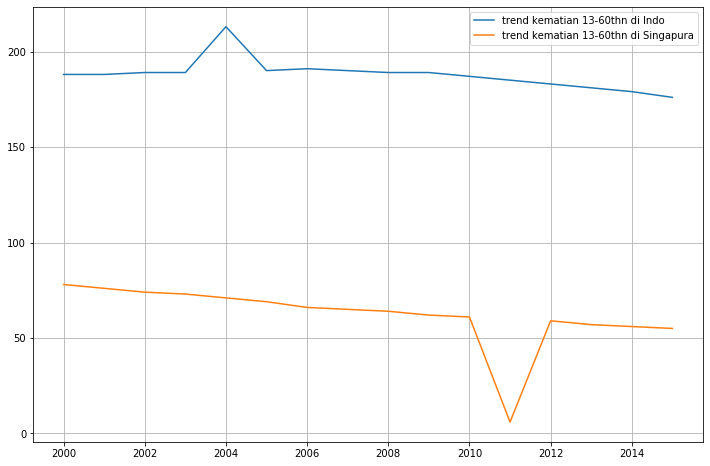

In [264]:
plt.plot(df_indo['Year'], df_indo['Adult Mortality'],df_sing['Year'], df_sing['Adult Mortality'])
plt.grid(True)
plt.legend(['trend kematian 13-60thn di Indo', 'trend kematian 13-60thn di Singapura'], loc=0)

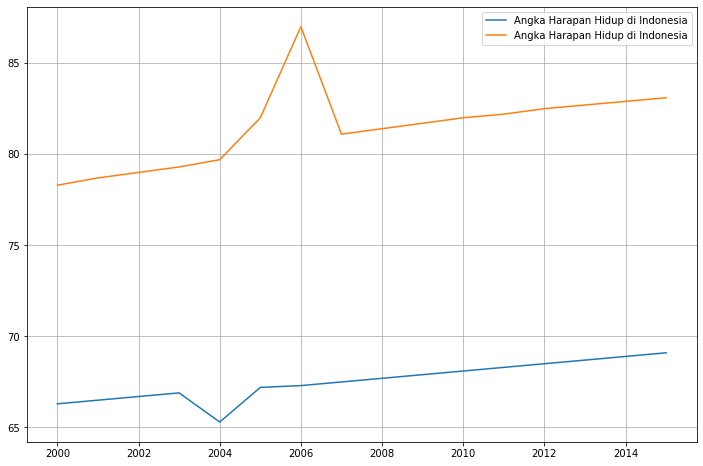

In [267]:
plt.plot(df_indo['Year'], df_indo['Life expectancy '],df_sing['Year'], df_sing['Life expectancy '])
plt.grid(True)
plt.legend(['Angka Harapan Hidup di Indonesia', 'Angka Harapan Hidup di Indonesia'], loc=0)

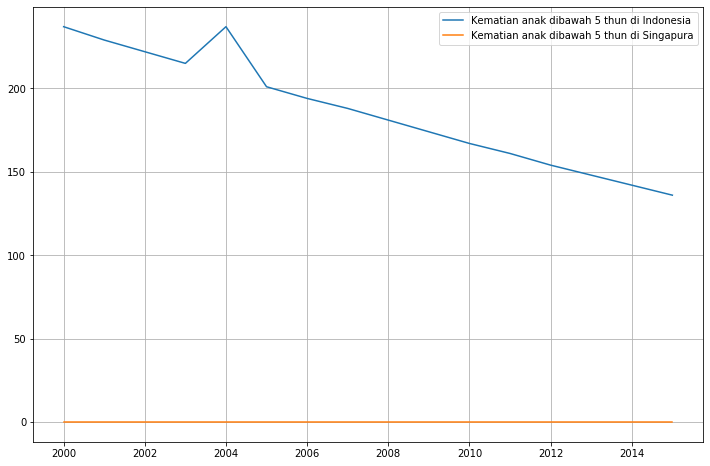

In [270]:
plt.plot(df_indo['Year'], df_indo['under-five deaths '],df_sing['Year'], df_sing['under-five deaths '])
plt.grid(True)
plt.legend(['Kematian anak dibawah 5 thun di Indonesia', 'Kematian anak dibawah 5 thun di Singapura'], loc=0)

##### Malaysia

In [253]:
df_malay = df[df['Country']=='Malaysia']
df_malay

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1586,Malaysia,2015,Developing,75.0,123.0,4,NaN,0.000000,99.0,1318,...,99.0,NaN,99.0,0.1,9643.644683,3723155.0,7.5,7.3,0.787,13.1
1587,Malaysia,2014,Developing,74.8,126.0,4,0.52,721.365543,96.0,221,...,97.0,4.17,97.0,0.1,11183.961910,322817.0,7.6,7.4,0.783,13.0
1588,Malaysia,2013,Developing,74.6,128.0,3,0.53,110.677971,96.0,195,...,97.0,4.20,97.0,0.1,1882.278420,2976724.0,7.8,7.6,0.779,12.9
1589,Malaysia,2012,Developing,74.5,129.0,3,0.53,101.609245,97.0,1868,...,97.0,4.10,97.0,0.1,1779.496410,2917456.0,7.9,7.7,0.776,12.9
1590,Malaysia,2011,Developing,74.3,13.0,3,0.51,9.230026,96.0,1569,...,96.0,3.89,96.0,0.1,145.126200,28635128.0,8.0,7.8,0.774,13.0
1591,Malaysia,2010,Developing,74.1,131.0,3,0.49,65.566597,96.0,73,...,96.0,3.99,96.0,0.1,971.356987,28112289.0,8.2,8.0,0.764,12.8
1592,Malaysia,2009,Developing,74.0,131.0,3,0.47,431.545247,96.0,153,...,97.0,3.97,97.0,0.1,7326.744435,2765383.0,8.3,8.2,0.756,12.6
1593,Malaysia,2008,Developing,73.8,132.0,3,0.47,438.451921,97.0,334,...,97.0,3.47,97.0,0.1,8513.629541,2711169.0,8.5,8.3,0.747,12.5
1594,Malaysia,2007,Developing,73.7,133.0,3,0.43,409.981252,96.0,394,...,97.0,3.61,97.0,0.1,7269.171140,26625845.0,8.7,8.5,0.736,12.3
1595,Malaysia,2006,Developing,73.6,134.0,3,0.42,365.911398,95.0,564,...,95.0,3.65,95.0,0.1,6222.982955,26143566.0,8.8,8.6,0.732,12.7


In [254]:
df_malay.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

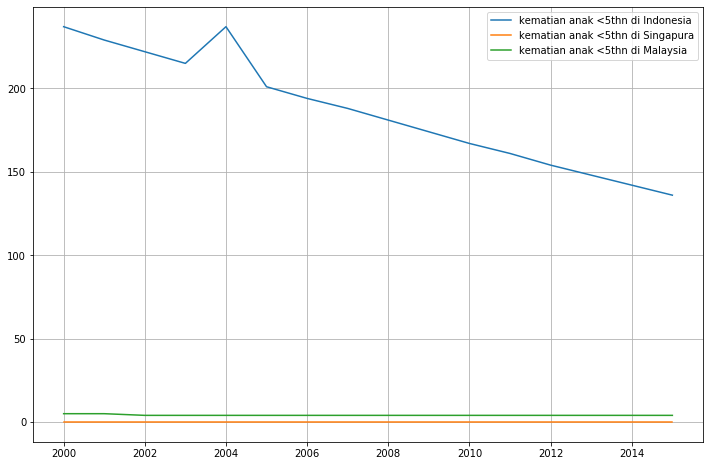

In [277]:
plt.plot(df_indo['Year'], df_indo['under-five deaths '],df_sing['Year'], df_sing['under-five deaths ']
         ,df_malay['Year'], df_malay['under-five deaths '])
plt.grid(True)
plt.legend(['kematian anak <5thn di Indonesia', 'kematian anak <5thn di Singapura'
            , 'kematian anak <5thn di Malaysia'], loc=0)

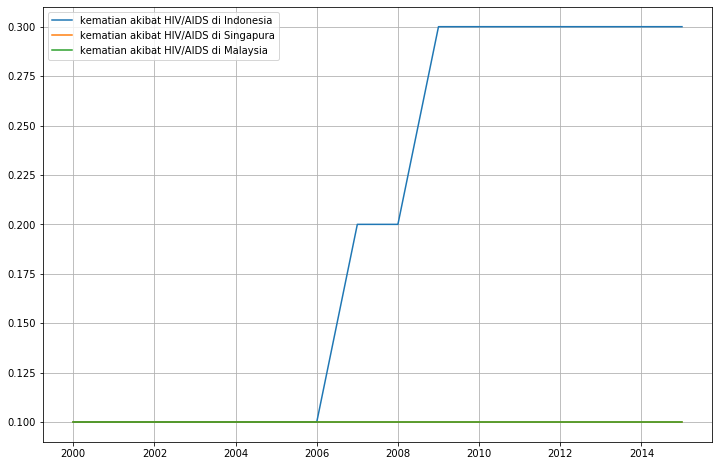

In [281]:
plt.plot(df_indo['Year'], df_indo[' HIV/AIDS'],df_sing['Year'], df_sing[' HIV/AIDS']
         ,df_malay['Year'], df_malay[' HIV/AIDS'])
plt.grid(True)
plt.legend(['kematian akibat HIV/AIDS di Indonesia', 'kematian akibat HIV/AIDS di Singapura'
            , 'kematian akibat HIV/AIDS di Malaysia'], loc=0)

##### Australia

In [212]:
df_aussie = df[df['Country']=='Australia']
df_aussie

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
112,Australia,2015,Developed,82.8,59.0,1,NaN,0.000000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
113,Australia,2014,Developed,82.7,6.0,1,9.71,10769.363050,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
114,Australia,2013,Developed,82.5,61.0,1,9.87,11734.853810,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
115,Australia,2012,Developed,82.3,61.0,1,10.03,11714.998580,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
116,Australia,2011,Developed,82.0,63.0,1,10.30,10986.265270,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8
117,Australia,2010,Developed,81.9,64.0,1,10.52,8875.786493,92.0,70,...,92.0,9.20,92.0,0.1,51874.84800,223175.0,0.7,0.6,0.927,19.5
118,Australia,2009,Developed,81.7,66.0,1,10.62,7172.275229,94.0,104,...,92.0,9.50,92.0,0.1,42742.99898,216917.0,0.7,0.6,0.925,19.1
119,Australia,2008,Developed,81.3,66.0,1,10.76,8547.292357,94.0,65,...,92.0,8.78,92.0,0.1,49664.68540,212492.0,0.7,0.6,0.921,19.1
120,Australia,2007,Developed,81.3,66.0,1,10.56,872.598609,94.0,11,...,92.0,8.53,92.0,0.1,4991.98289,28276.0,0.7,0.6,0.918,19.0
121,Australia,2006,Developed,81.2,66.0,1,10.31,6187.062017,95.0,0,...,92.0,8.49,92.0,0.1,36118.28381,26979.0,0.7,0.6,0.915,20.3


In [255]:
df_aussie.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            1
percentage expenditure             0
Hepatitis B                        1
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  1
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

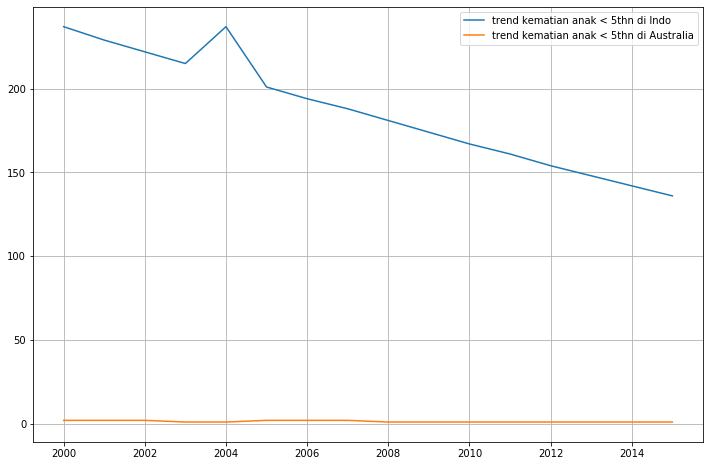

In [290]:
plt.plot(df_indo['Year'], df_indo['under-five deaths '],df_aussie['Year'], df_aussie['under-five deaths '])
plt.grid(True)
plt.legend(['trend kematian anak < 5thn di Indo', 'trend kematian anak < 5thn di Australia'], loc=0)

##### Brunei Darussalam

In [214]:
df_brunei = df[df['Country']=='Brunei Darussalam']
df_brunei

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
368,Brunei Darussalam,2015,Developing,77.7,78.0,0,NaN,0.000000,99.0,4,...,99.0,NaN,99.0,0.1,3967.89510,NaN,5.7,5.1,0.864,14.9
369,Brunei Darussalam,2014,Developing,77.6,8.0,0,0.01,269.143278,99.0,1,...,99.0,2.65,99.0,0.1,4159.86520,NaN,5.7,5.2,0.863,15.0
370,Brunei Darussalam,2013,Developing,77.1,84.0,0,0.01,2845.306444,98.0,0,...,99.0,2.61,99.0,0.1,44597.27968,NaN,5.8,5.2,0.860,14.9
371,Brunei Darussalam,2012,Developing,78.3,79.0,0,0.01,3192.634413,99.0,1,...,99.0,2.30,99.0,0.1,47651.25990,NaN,5.8,5.3,0.852,14.4
372,Brunei Darussalam,2011,Developing,77.4,79.0,0,0.97,295.773017,93.0,4,...,99.0,2.25,97.0,0.1,4717.27300,NaN,5.9,5.4,0.846,14.1
373,Brunei Darussalam,2010,Developing,76.9,79.0,0,0.88,2218.364226,96.0,0,...,99.0,2.73,95.0,0.1,35268.11170,NaN,5.9,5.4,0.845,14.2
374,Brunei Darussalam,2009,Developing,76.8,88.0,0,0.25,1873.686852,96.0,2,...,99.0,2.85,99.0,0.1,27965.47540,NaN,6.0,5.5,0.841,14.1
375,Brunei Darussalam,2008,Developing,77.2,84.0,0,0.67,2538.941033,96.0,3,...,97.0,2.23,98.0,0.1,37951.28600,NaN,6.1,5.6,0.840,14.2
376,Brunei Darussalam,2007,Developing,76.0,1.0,0,0.85,2048.557422,97.0,0,...,95.0,2.32,99.0,0.1,32672.36717,NaN,6.2,5.7,0.840,14.3
377,Brunei Darussalam,2006,Developing,76.3,93.0,0,0.67,24.975329,99.0,0,...,94.0,2.24,97.0,0.1,398.96692,NaN,6.3,5.8,0.837,14.3


In [256]:
df_brunei.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Hepatitis B                         0
Measles                             0
 BMI                                0
under-five deaths                   0
Polio                               0
Total expenditure                   1
Diphtheria                          0
 HIV/AIDS                           0
GDP                                 0
Population                         16
 thinness  1-19 years               0
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
dtype: int64

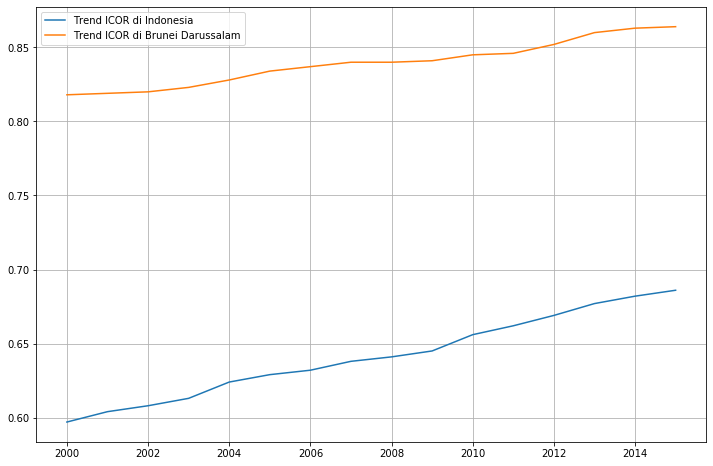

In [295]:
plt.plot(df_indo['Year'], df_indo['Income composition of resources'],df_brunei['Year']
         , df_brunei['Income composition of resources'])
plt.grid(True)
plt.legend(['Trend ICOR di Indonesia', 'Trend ICOR di Brunei Darussalam'], loc=0)

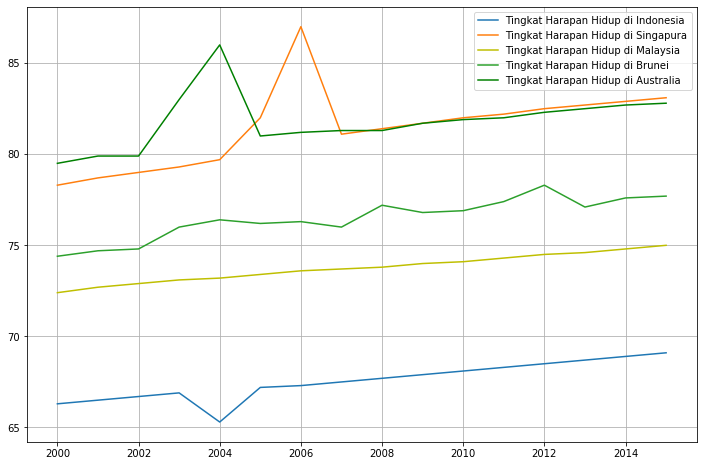

In [302]:
plt.plot(df_indo['Year'], df_indo['Life expectancy '],df_sing['Year'], df_sing['Life expectancy ']
        ,df_malay['Year'], df_malay['Life expectancy '], 'y',df_brunei['Year'], df_brunei['Life expectancy ']
        ,df_aussie['Year'], df_aussie['Life expectancy '],'g')
plt.grid(True)
plt.legend(['Tingkat Harapan Hidup di Indonesia', 'Tingkat Harapan Hidup di Singapura'
            , 'Tingkat Harapan Hidup di Malaysia', 'Tingkat Harapan Hidup di Brunei'
           ,'Tingkat Harapan Hidup di Australia'], loc=0)

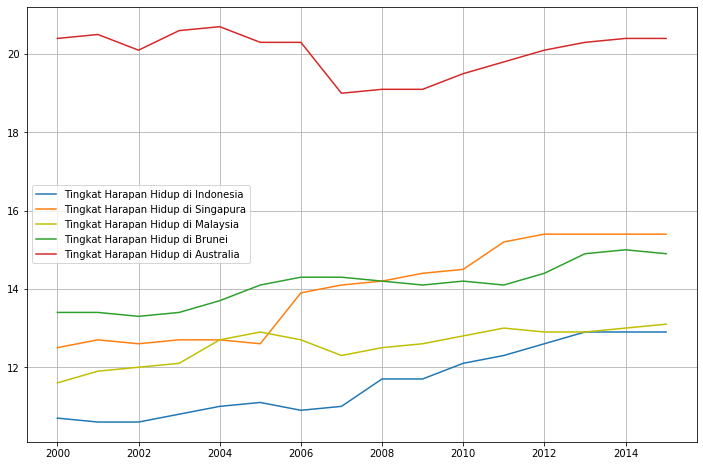

In [305]:
plt.plot(df_indo['Year'], df_indo['Schooling'],df_sing['Year'], df_sing['Schooling']
        ,df_malay['Year'], df_malay['Schooling'], 'y',df_brunei['Year'], df_brunei['Schooling']
        ,df_aussie['Year'], df_aussie['Schooling'])
plt.grid(True)
plt.legend(['Tingkat Harapan Hidup di Indonesia', 'Tingkat Harapan Hidup di Singapura'
            , 'Tingkat Harapan Hidup di Malaysia', 'Tingkat Harapan Hidup di Brunei'
           ,'Tingkat Harapan Hidup di Australia'], loc=0)

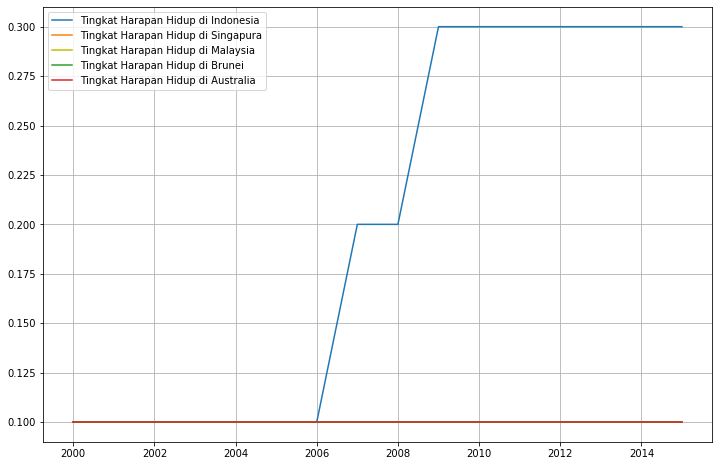

In [312]:
plt.plot(df_indo['Year'], df_indo[' HIV/AIDS'],df_sing['Year'], df_sing[' HIV/AIDS']
        ,df_malay['Year'], df_malay[' HIV/AIDS'], 'y',df_brunei['Year'], df_brunei[' HIV/AIDS']
        ,df_aussie['Year'], df_aussie[' HIV/AIDS'])
plt.grid(True)
plt.legend(['Tingkat Harapan Hidup di Indonesia', 'Tingkat Harapan Hidup di Singapura'
            , 'Tingkat Harapan Hidup di Malaysia', 'Tingkat Harapan Hidup di Brunei'
           ,'Tingkat Harapan Hidup di Australia'], loc=0)

In [ ]:
plt.plot(df_indo['Year'], df_indo['Life expectancy '],df_sing['Year'], df_sing['Life expectancy ']
        ,df_malay['Year'], df_malay['Life expectancy '], 'y',df_brunei['Year'], df_brunei['Life expectancy ']
        ,df_aussie['Year'], df_aussie['Life expectancy '],'g')
plt.grid(True)
plt.legend(['Tingkat Harapan Hidup di Indonesia', 'Tingkat Harapan Hidup di Singapura'
            , 'Tingkat Harapan Hidup di Malaysia', 'Tingkat Harapan Hidup di Brunei'
           ,'Tingkat Harapan Hidup di Australia'], loc=0)

### Insight Berdasarkan Analisis yang dilakukan
Berdasarkan penelitian yang dilakukan, beberapa informasi yang didapatkan antara lain :
1. Tingkat Harapan Hidup di Indonesia cenderung naik bersamaan dengan penurunan trend kematian bayi, anak dibawah 5 tahun, dan yang berusia 13-60 tahun. Namun, sangat jelas angka kematian akibat HIV/AIDS meningkat secara signifikan.
2. Kenaikan Tingkat Harapan Hidup juga dipengaruhi oleh  ratio pelajar tiap tahun (pada variabel Schooling)
3. Indonesia masih tertinggal cukup signifikan dengan negara tetangga

### Kesimpulan dan Saran

`Berdasarkan dataset dan analisis yang dilakukan, Indonesia memiliki trend bagus dalam peningkatan Kualitas Harapan Hidup dari tahun 2000 - 2015. Namun, dilihat dari Kematian bayi, anak dibawah 5 tahun, dan 13-60 tahun, sekalipun pertahun grafiknya melandai kebawah, penurun tingkat kematian untuk usia 13-60 tahun lambat, berbeda dengan kematian bayi maupun anak dibawah 5 tahun yang cenderung menurun secara signifikan. terlihat juga beberapa variabel salah satunya GDP justru tidak terlalu memiliki pengaruh terhadap kenaikan harapan hidup.`

`Berdasarkan analisi perbandingan antar negara tetangga, yaitu Singapura, Malaysia, Brunei, dan Australia, terlihat dari beberapa variabel yang diukur, Indonesia sangat ketinggalan dibandingkan yang lain.`

Rekomendasi yang dapat diberikan adalah dengan meningkatkan kualitas pada sektor kesehatan dan pendidikan di Indonesia untuk peningkatan harapan hidup di tahun berikutnya. Keseriusan terhadap HIV/AIDS juga sebaiknya menjadi area yang dapat difokuskan, karena memiliki cukup pengaruh terutama pada sektor kesehatan